Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
Models Trained Successfully!

 Model Evaluation (MSE):
Linear Regression MSE: 26695878787.88
Polynomial Regression MSE: 210343822.84


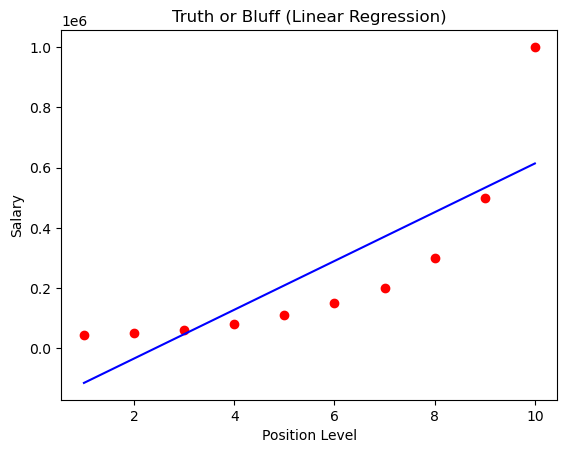

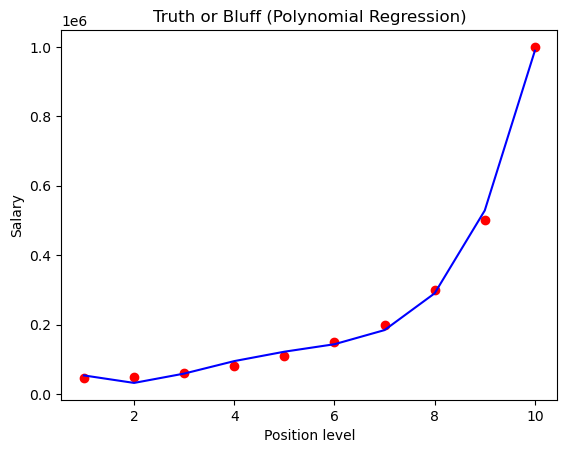

C:\Users\sushm\AppData\Local\Temp\ipykernel_27524\469822281.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


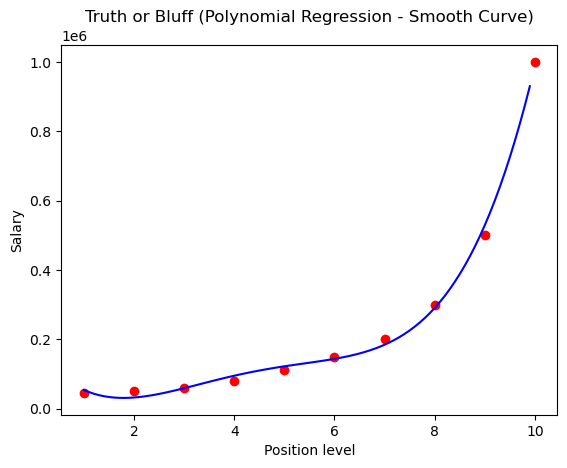


Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265153]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Importing the dataset
dataset = pd.read_csv("C:\\Users\\sushm\\Downloads\\Position_Salaries.csv")
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())
 
 
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("Models Trained Successfully!")
 
 
# -------------------------------
# Predictions for RMSE calculation
# -------------------------------
from sklearn.metrics import mean_squared_error

# Linear Regression predictions
y_pred_lr = lin_reg.predict(X)

# Polynomial Regression predictions
y_pred_pr = lin_reg_2.predict(X_poly)

# MSE calculation
mse_lr = mean_squared_error(y, y_pred_lr)
mse_pr = mean_squared_error(y, y_pred_pr)

print("\n Model Evaluation (MSE):")
print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Polynomial Regression MSE: {mse_pr:.2f}")
 
 
# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results (smooth curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("\nLinear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)


   enginesize    price
0         130  13495.0
1         130  16500.0
2         152  16500.0
3         109  13950.0
4         136  17450.0


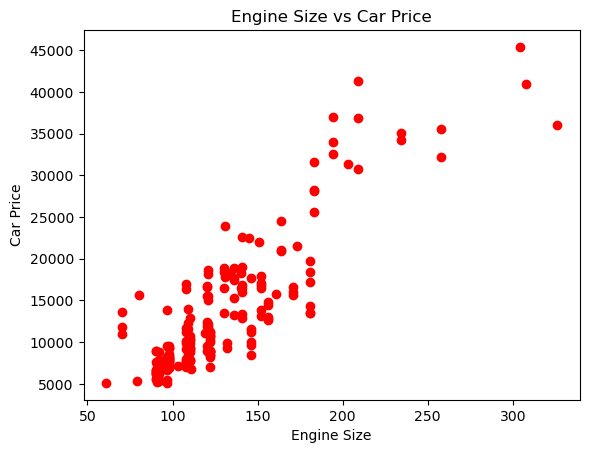

Linear Regression R² on Training Set: 0.7577


C:\Users\sushm\AppData\Local\Temp\ipykernel_27524\4217927446.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 1).reshape(-1,1)


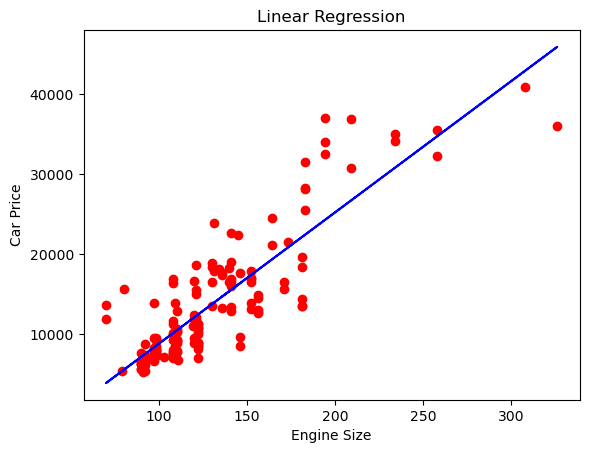

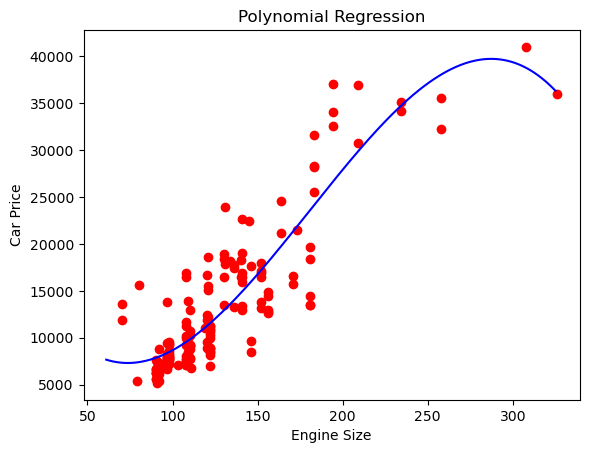

Linear Prediction (Engine Size = 200): 25249.719405144046
Polynomial Prediction (Engine Size = 200): 27896.012144577595

Linear Regression -> MSE: 16835544.03813768  R²: 0.7825324721447274
Polynomial Regression -> MSE: 15107120.517827434  R²: 0.8048588067851348


In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset = pd.read_csv('C:\\Users\\sushm\\Downloads\\CarPrice_Assignment.csv')

# Relevant columns
X = dataset[['enginesize']].values   # Input feature
y = dataset['price'].values          # Output variable

print(dataset[['enginesize', 'price']].head())

# Visualize Engine Size vs Price

plt.scatter(X, y, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs Car Price')
plt.show()

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 1. Simple Linear Regression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
train_pred=lin_model.predict(X_train)
r2_train=r2_score(y_train,train_pred)
print(f"Linear Regression R² on Training Set: {r2_train:.4f}")

y_pred_lin = lin_model.predict(X_test)

# 2. Polynomial Regression (More Flexible)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

# Visualization: Linear vs Polynomial

X_grid = np.arange(min(X), max(X), 1).reshape(-1,1)

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lin_model.predict(X_train), color='blue')
plt.title('Linear Regression')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.show()

plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, poly_model.predict(poly.transform(X_grid)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.show()
# Predict price for Engine Size = 200

linear_price = lin_model.predict([[200]])
poly_price = poly_model.predict(poly.transform([[200]]))

print("Linear Prediction (Engine Size = 200):", linear_price[0])
print("Polynomial Prediction (Engine Size = 200):", poly_price[0])


# Model Evaluation

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nLinear Regression -> MSE:", mse_lin, " R²:", r2_lin)
print("Polynomial Regression -> MSE:", mse_poly, " R²:", r2_poly)


In [22]:
print(r2_lin)
print(r2_train)

0.7825324721447274
0.7577401601740769


<Axes: >

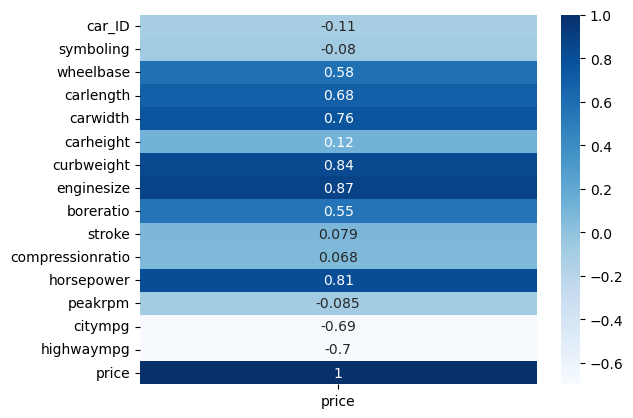

In [25]:
import seaborn as sns
numerical_cols=dataset.select_dtypes(include=['number'])
correlation_matrix=numerical_cols.corr()[['price']]
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

# INSIGHTS

## Strong: |correlation| ≥ 0.70

## Moderate: 0.40 ≤ |correlation| < 0.70

## Weak: |correlation| < 0.40

---------------------------------------------------------
### enginesize=+0.87 -Strong Positive

### car_ID = −0.11 - Weak Negative

### symboling = −0.08 - Weak Negative

### wheelbase = +0.58 - Moderate Positive

### carlength = +0.68 - Moderate Positive

### carwidth = +0.76 - Strong Positive

### carheight = +0.12 - Weak Positive

### curbweight = +0.84 - Strong Positive

### enginesize = +0.87 - Strong Positive

### boreratio = +0.55 - Moderate Positive

### stroke = +0.08 - Weak Positive

### compressionratio = +0.07 - Weak Positive

### horsepower = +0.81 - Strong Positive

### peakrpm = −0.09 - Weak Negative

### citympg = −0.69 - Strong Negative


### symboling,stroke,compressionratio,peakrpm(all are less than 0.1)(4)
## above are very less correlated
The above variables have lessc orrelation so we can remove these variables



In [ ]:
dataset.drop('price',axis=1)



<Axes: >

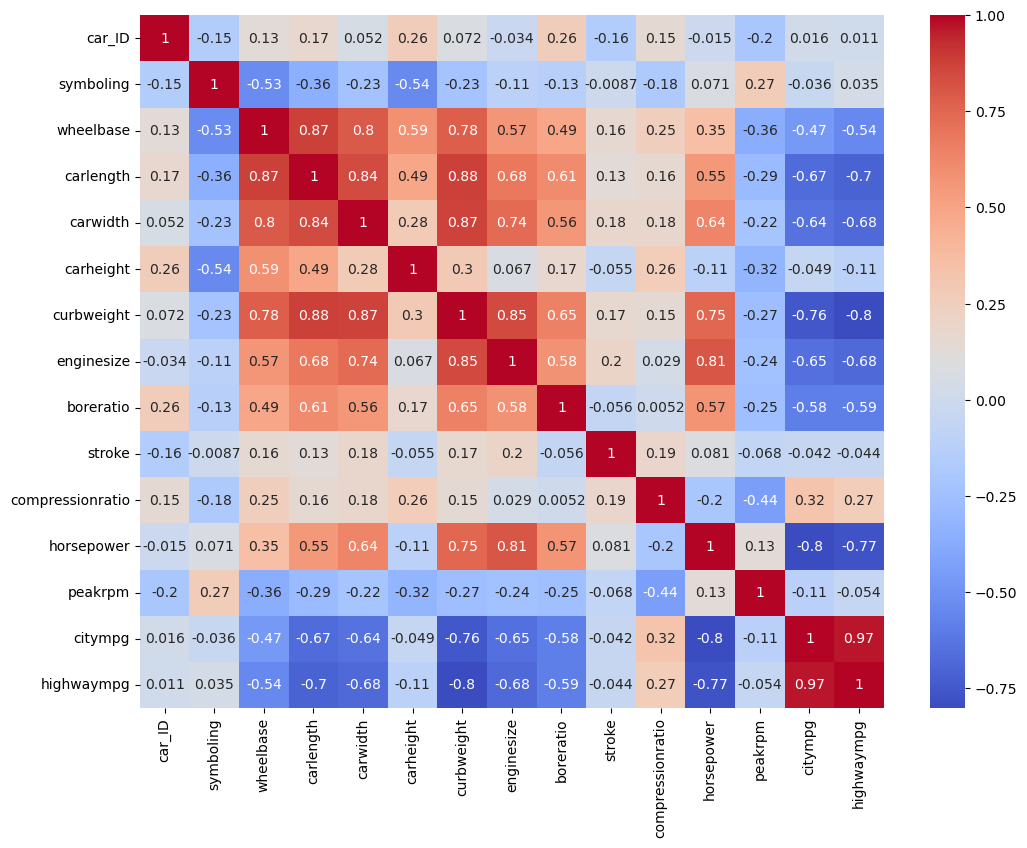

In [33]:
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(numeric_only=True), annot=True,cmap='coolwarm')

<Axes: >

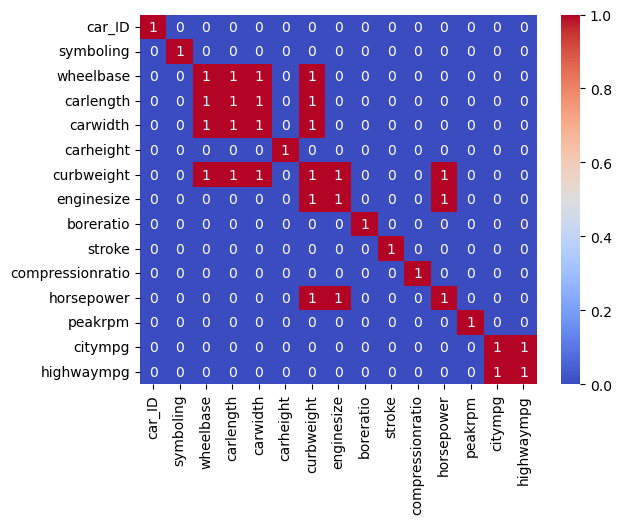

In [30]:
sns.heatmap(dataset.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')

## Below columns are highly correlated
1. (wheelbase,carlength)-0.87

2. (wheelbase,carwidth)-0.79

3. (wheelbase,curbwidth)-0.84

4. (carlength,carwidth)-0.78

5. (carlength,curbwidth)-0.88

6. (carwidth,curbweight)-0.87

7. (curbweight,enginesize)-0.85

8. (horsepower,curbweight)-0.86

9. (horsepower,enginesize)-0.81

10. (citympg,highwaympg)-0.84

Unique columns are wheelbase ,carlength ,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg(8)


(wheelbase,Price)- 0.58
(carlength,Price) -0.68
(carwidth,Price)- 0.76
(curbweigth,Price)- 0.84
(enginesize,Price)- 0.87
(horsepower,Price)- 0.81
(citympg,Price)- (-0.69)
(highwaympg,Price)- (-0.70)
## ARe are moderateky are stringly related so keep all

In [34]:
## drop symboling,stroke,compressionratio,peakrpm
dataset.drop(['symboling', 'stroke', 'compressionratio', 'peakrpm'], axis=1, inplace=True)